# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [216]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans 

## Load the Data

In [4]:
dataset = pd.read_csv('Traffic_Accidents.csv')

In [6]:
dataset

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [10]:
dataset.dtypes

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                              float64
Number_of_Vehicles                               int64
Number_of_Casualties                           float64
Date                                            object
Day_of_Week                                      int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
2nd_Road_Class                                   int64
2nd_Road_Number                                  int64
Pedestrian

In [12]:
dataset.shape

(52000, 26)

In [14]:
dataset.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
6383,384970.0,402990.0,-2.228183,53.523351,6,3.0,2,1.0,23/09/2006,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2006
34686,459755.0,298600.0,-1.119538,52.581906,33,3.0,2,1.0,31/08/2012,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
44222,491920.0,162670.0,-0.681304,51.355622,45,3.0,2,2.0,01/03/2006,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2006
20110,420150.0,585480.0,-1.685253,55.163259,10,3.0,1,1.0,08/10/2009,5,...,3,192,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2009
5532,410900.0,294340.0,-1.840702,52.546775,20,3.0,2,1.0,12/01/2007,6,...,6,0,None within 50 metres,Zebra crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2007


In [16]:
dataset.tail(2)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [18]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,52000.0,440284.256846,95109.751221,98480.000000,375540.000000,440950.000000,523500.000000,6.549600e+05
Location_Northing_OSGR,52000.0,299861.656788,161362.379650,19030.000000,178010.000000,267180.000000,398149.250000,1.203900e+06
Longitude,52000.0,-1.427193,1.398249,-6.895268,-2.366190,-1.391202,-0.214666,1.753632e+00
Latitude,52000.0,52.586684,1.453049,50.026153,51.487676,52.295042,53.478016,6.071477e+01
Police_Force,52000.0,30.401712,25.545581,1.000000,7.000000,30.000000,46.000000,9.800000e+01
Accident_Severity,51678.0,2.837145,0.402582,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,52000.0,1.834327,0.727856,1.000000,1.000000,2.000000,2.000000,3.400000e+01
Number_of_Casualties,50959.0,1.354756,0.855220,1.000000,1.000000,1.000000,1.000000,5.100000e+01
Day_of_Week,52000.0,4.130712,1.926217,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),52000.0,349.542558,259.504721,1.000000,112.000000,323.000000,530.000000,9.410000e+02


In [20]:
dataset.duplicated().sum()

43

In [22]:
dataset.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

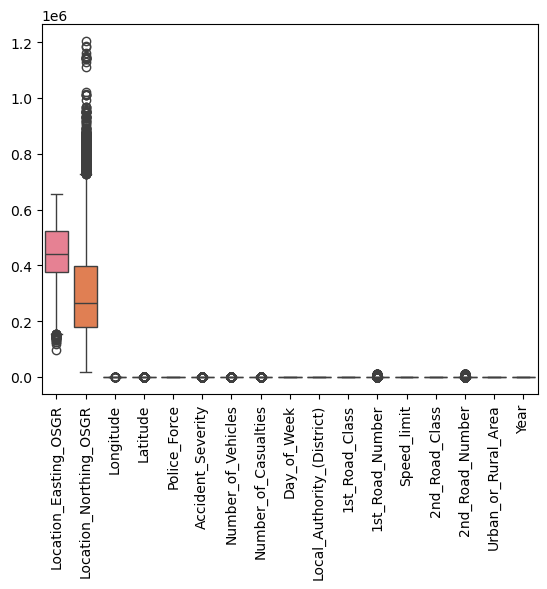

In [226]:
sns.boxplot(data=ds)
plt.xticks(rotation=90)
plt.show()

In [228]:
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1
threshold = 9.5
df = ds[~((ds < (Q1 - threshold * IQR)) | (ds > (Q3 + threshold * IQR))).any(axis=1)]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
sns.boxplot(data=)
plt.xticks(rotation=90)
plt.show()

In [24]:
res = dataset['Light_Conditions'].mode()
res

0    Daylight: Street light present
Name: Light_Conditions, dtype: object

In [26]:
dataset['Light_Conditions'].fillna('Daylight: Street light present', inplace=True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_24651/1562943295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Light_Conditions'].fillna('Daylight: Street light present', inplace=True)


In [30]:
dataset['Accident_Severity'].fillna(dataset['Accident_Severity'].mean(), inplace=True)
dataset['Number_of_Casualties'].fillna(dataset['Number_of_Casualties'].mean(), inplace=True)
dataset['Urban_or_Rural_Area'].fillna(dataset['Urban_or_Rural_Area'].mean(), inplace=True)

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_24651/1769401954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Accident_Severity'].fillna(dataset['Accident_Severity'].mean(), inplace=True)
/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_24651/1769401954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

In [32]:
dataset.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

In [40]:
ds = dataset.drop_duplicates()

In [42]:
ds.duplicated().sum()

0

In [150]:
data_s = pd.get_dummies(ds, columns=['Date','Local_Authority_(Highway)','Road_Type','Pedestrian_Crossing-Human_Control',
                                     'Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions',
                                     'Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident'])
data_s

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,6,556,...,False,False,False,True,False,False,False,False,False,True
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1,26,...,False,False,True,False,False,False,False,False,False,True
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,4,746,...,False,False,True,False,False,False,False,False,False,True
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,7,84,...,False,False,False,False,False,False,False,True,False,True
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,3,257,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,6,365,...,False,False,True,False,False,False,False,False,False,True
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,4,502,...,False,False,True,False,False,False,False,False,False,True
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,3,516,...,False,False,False,False,False,False,False,True,False,True
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,6,323,...,False,False,False,False,False,False,False,True,False,True


In [76]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_s)

In [87]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
print(f"Reduced dimensions: {pca_data.shape[1]}")

Reduced dimensions: 2


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

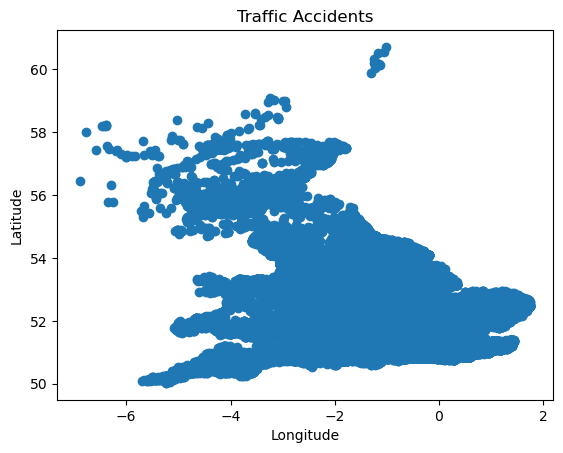

In [102]:
plt.scatter(ds['Longitude'], ds['Latitude'])
plt.title('Traffic Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

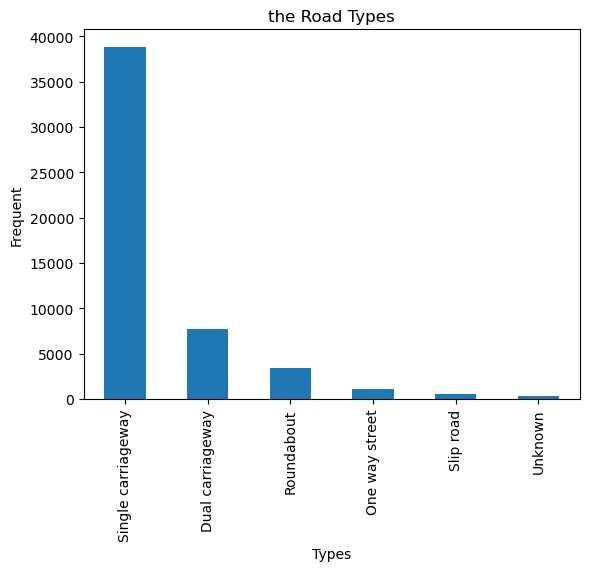

In [106]:
ds['Road_Type'].value_counts().plot(kind='bar')
plt.title('the Road Types')
plt.xlabel('Types')
plt.ylabel('Frequent')
plt.show()

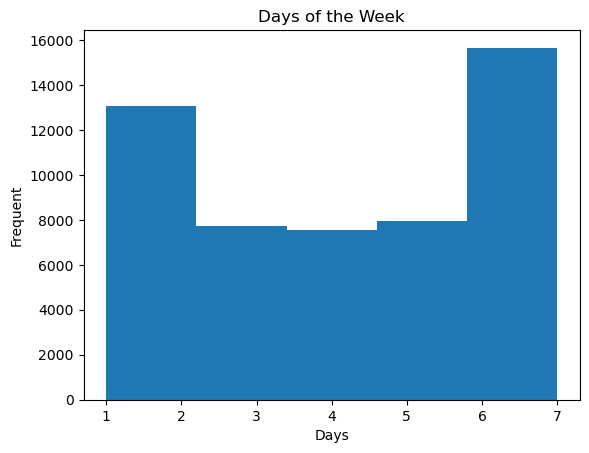

In [142]:
plt.hist(ds['Day_of_Week'], bins=5)
plt.title('Days of the Week')
plt.xlabel('Days')
plt.ylabel('Frequent')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [160]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

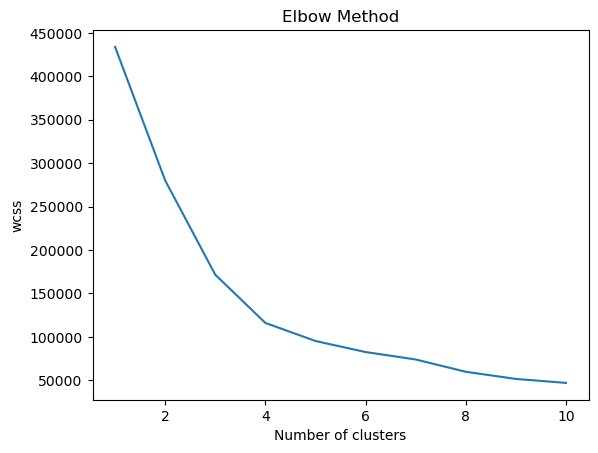

In [162]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [204]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_

In [206]:
kmeans.cluster_centers_

array([[ 0.86645895, -2.35281765],
       [-2.54403232, -0.02259593],
       [ 5.05872389,  2.002535  ],
       [-0.07078067,  1.19954636]])

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [220]:
silhouette_avg = silhouette_score(pca_data, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.43581739593279517


## Plot the data points with their predicted cluster center

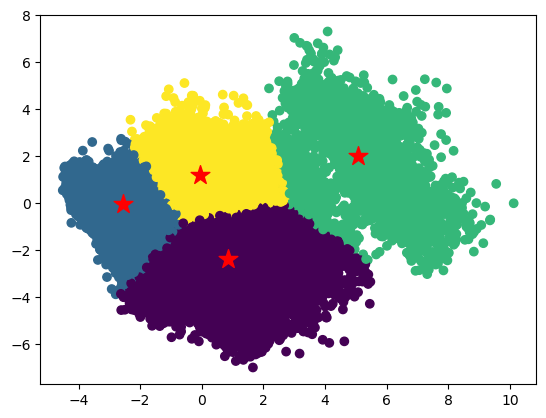

In [211]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*')

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

** How did you determine the optimal number?

i see from the cruve don't change any more after the elbow in number 3 that means no change in the centers of the clusters when added new point so that's mean the model is convergece. 

** Which metrics did you use to evaluate the clustering results, and why?

its one of the clustering metrics, And it's returns the mean silhouette coefficient over all samples. 
To obtain the values for each sample.
unsupervised evaluation try to measures the quality of the model itself.

**How do these metrics help in understanding the effectiveness of your clustering approach?